### TUTORIAL PARA EL USO DE REDAPY A NIVEL DISTRITAL
Redapy es una libreria escrita en python que permite descargar datos censales del procesador estadístico de Redatam (https://censos2017.inei.gob.pe/redatam/) y transformar sus resultados en una matriz que usa el ubigeo como variable única de indexación.

Para el siguiente ejemplo, vamos a usar el módulo de Redapy para explorar las características de la población que vive en viviendas alquiladas en Lima metropolitana en el año 2017. Para ello, lo primero que haremos será llamar la libreria redapy y la libreria pandas, esencial para el procesamiento de bases de datos.

_OJO: Recuerda que las tablas que devuelve redapy **siempre** son dataframes de la libreria pandas_

In [1]:
import redapy
import pandas as pd

### Quick start

Antes de identificar a la población que vive en viviendas alquiladas, identificamos la condición de las viviendas censadas. Para ello usaremos la variable "vivienda.C2P13" la cual recoge las respuestas sobre la tenencia de la vivienda del censo 2017. Como nuestra consulta utilizará solo una variable en el parámetro "tipo" especificaremos que el tiepo de consulta será únicamente de fecuencia (tipo="Frequency"). Luego, para optener el resultado esperado, especificamos el nivel de salida de la variable y el ubigeo de interés, que en nuestro caso corresponde el ubigeo de la provincia de Lima Metropolitana. De acuerdo a las indicaciones previas, los parámetros son:
- tipo ="Frequency"
- var1="vivienda.C2P13"
- area_break="ditrito"
- selection="1501"

In [3]:
redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:06.546895


,0,1,2,3,4,5
0,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica
1,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION
2,Frecuencia,Frecuencia,Frecuencia,Frecuencia,Frecuencia,Frecuencia
3,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
527,NaN,Cedida,154 415,"7,10%","99,86%",NaN
528,NaN,Otra forma,3 022,"0,14%","100,00%",NaN
529,NaN,Total,2 175 200,"100,00%","100,00%",NaN
530,NaN,NaN,NaN,NaN,NaN,NaN


El resultado nos muestra que la consulta se ejecutó en cerca de 7 segundos y devolvió una base de datos similar a la que genera una consulta desde la web de REDATAM: una base de datos con una tabla por **UBIGEO**. Este formato se puede apreciar mejor al filtral un determinado número de filas, en este caso filtraremos las filas que van desde 17 hasta la 31. Para ello usaremos el comando _iloc_ de la libreria pandas.

_Nota que hemos nombrado el resultado con el nombre de "df", que es una convención para definir a un dataframe_

In [7]:
df=redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")
df.iloc[17:31]

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:06.377143


,0,1,2,3,4,5
17,NaN,AREA # 150102,"Lima, Lima, distrito: Ancón",NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,V: Tenencia de la vivienda - La vivienda que o...,Casos,%,Acumulado %,NaN
20,NaN,Alquilada,1 134,"6,78%","6,78%",NaN
21,NaN,Propia sin título de propiedad,9 539,"57,03%","63,81%",NaN
22,NaN,Propia con título de propiedad,5 111,"30,56%","94,36%",NaN
23,NaN,Cedida,926,"5,54%","99,90%",NaN
24,NaN,Otra forma,17,"0,10%","100,00%",NaN
25,NaN,Total,16 727,"100,00%","100,00%",NaN
26,NaN,NaN,NaN,NaN,NaN,NaN


Este tipo de estructura de datos, si bien resulta de fácil lectura, suele ser poco útil para el análisis comparado en tanto no es posible organizar facilmente los datos en una matriz donde cada columna corresponda a una varible y cada fila un caso, como por ejemplo, uno de los distritos de Lima Metropolitana, lo que además facilitaría su visualización vectorial en forma de mapa. Por lo tanto, se requiere tranformar esta base de datos de tabla individuales en una matriz de datos que facilite su análisis y visualización. 

**Redapy** permite transformar estas tablas usando el submódulo **frequency**, el cual recoge los datos de cada tabla y agrupa las respuestas por ubigeo

In [8]:
redapy.frequency(df)

,resp,fre,ubigeo
8,Alquilada,26985,150101
9,Propia sin título de propiedad,10045,150101
10,Propia con título de propiedad,31809,150101
11,Cedida,5326,150101
12,Otra forma,200,150101
...,...,...,...
512,Alquilada,8881,150143
513,Propia sin título de propiedad,27677,150143
514,Propia con título de propiedad,49947,150143
515,Cedida,7209,150143


Esta función, también cuenta con un parámetro que pivotea directamente los datos en una matriz de 2x2, la cual toma la variable de ubigeo como identificador único (index) y las categorias de la variable seleccionada como columnas de matriz.

In [10]:
redapy.frequency(df, pivot=True)

resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad
ubigeo,,,,,
150101,26985,5326,200,31809,10045
150102,1134,926,17,5111,9539
150103,38579,9859,191,56636,46421
150104,3802,549,39,5529,1034
150105,9988,1396,63,9972,2980
150106,10497,5723,83,29025,34213
150107,1762,925,8,4904,2168
150108,17977,6291,98,30283,18827
150109,1041,1117,11,1646,5139


De esta forma, con solo **2 líneas de código** y en menos de **5 minutos** obtenemos todas las categorias de la variable en una matriz de 2x2, donde cada fila corresponde a un distrito de Lima Metropolitana y cada columna a una de las categorías de la variable de tenencia de la vivienda. Este resultado puede ser usado para graficar las frecuencias de datos o para visualizar la distribución espacial de la variable en un programa GIS. Para guardar la matriz resultante puedes usar el módulo de pandas _to_excel()_ para grabar el resultado en un archivo de excel.

El resultado final del código necesario para realizar la consulta, transformar los resultados y guardarlos sería el siguiente:

In [12]:
df=redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")
df1=redapy.frequency(df, pivot=True)

## Guardamos el resultado en un archivo excel
df1.to_excel("resultados\\tenencia de la vivienda_2017.xlsx")

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:10.780626


### Exploración de los resultados

Si bien la tabla anterior ya puede ser utilizada para hacer operaciones en excel o Qgis, nos interesa realizar algunos cálculos adicionales usando la librerio pandas.
Iniciaremos identificando el porcentaje de viviendas en alquiler por distrito, para ello lo primero que haremos será calcular la suma de viviendas y luego el porcentaje de viviendas alquiladas.

In [13]:
## creamos una variable con la suma total de casos por ubigeo
df1['viviendas_total']=df1.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df1['alquiler_p']=((df1.Alquilada/df1.viviendas_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
df1.sort_values("alquiler_p",ascending=False).head()

resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,viviendas_total,alquiler_p
ubigeo,,,,,,,
150115,22935,3043,113,17967,4730,48788,47.0
150137,22872,4734,55,14796,9336,51793,44.2
150105,9988,1396,63,9972,2980,24399,40.9
150134,5471,805,24,6083,1219,13602,40.2
150141,10159,1303,58,13129,3177,27826,36.5


La tabla anterior muestra que en los ditritos de la Victoria (150115), Santa Anita (150137), Breña (150105), San Luis (150134) y Surquillo (150141), se encuentran el mayor porcentaje de viviendas alquiladas en el año 2017, respectivamente. Por otra parte, que la vivienda se encuentre alquilada no quiere decir que la mayoría de hogares o personas del distrito vivian en viviendas alquiladas. Por esta razón calculamos la misma información pero a nivel de persona censada. Usaremos nuevamente el módulo de redapy, pero agregaremos una variable a la consulta: el sexo del encuestado (C5P2). Esto se logra cambiando el parámetro _tipo_ por "Crosstab" que nos permite realizar consultas para 2 variables (var1="vivienda.C2P13" y var2="poblacion.C5P2").

_Nota: Además pasamos el parámetro mensajes =False para reducir el número de msj durante la ejecución de la función y solo mantener el tiempo de extracción de datos desde REDATAM_

In [14]:
df2=redapy.query_2017(tipo='Crosstab',var1="vivienda.C2P13", var2="poblacion.C5P2",area_break="distrito",selection="1501", mensajes=False)
df2=redapy.cross_table(df2)
df2.head(10)


Tabla scrapeada con éxito en: 0:00:07.684530


freq
ubigeo fila                           columna        
150101 Alquilada                      Hombre    41312
                                      Mujer     43489
                                      Total     84801
       Propia sin título de propiedad Hombre    17431
                                      Mujer     19007
                                      Total     36438
       Propia con título de propiedad Hombre    58133
                                      Mujer     62707
                                      Total    120840
       Cedida                         Hombre     9422

Ahora podemos ver que tenemos el total de hombres y mujeres por el ubigeo del distrito y el tipo de tenencia de la vivienda. A continuación, haremos algunos cambios a la tabla resultante para lograr obtener el dato deseado.

_OJO: Si quisieramos tener una tabla multicolumna, solo sería necesario pasar el parámetro pivot=True en el submodulo cross_table: redapy.cross_table(df2, pivot=True)_

In [15]:
## Nos quedamos con la variable total y pivoteamos el resultado
df2=df2.reset_index().query('columna=="Total"').pivot(index="ubigeo",columns="fila",values="freq")
## sumamos todas las variables para tener el total de población por tipo de tenencia
df2['pob_total']=df2.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df2['alquiler_pob_p']=((df2.Alquilada/df2.pob_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
df2.sort_values("alquiler_pob_p",ascending=False).head(9)

fila,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,pob_total,alquiler_pob_p
ubigeo,,,,,,,
150115,73605,10712,400,67698,17302,169717,43.4
150105,31795,4968,205,35794,10286,83048,38.3
150137,69309,18334,188,65667,40722,194220,35.7
150116,18446,2768,61,28427,4417,54119,34.1
150134,17293,3084,81,25532,5027,51017,33.9
150141,29081,4415,185,43873,11397,88951,32.7
150101,84801,19113,672,120840,36438,261864,32.4
150104,10620,1769,138,17827,3464,33818,31.4
150122,29951,2461,166,58847,5897,97322,30.8


En relación a la población en vivienda alquiladas, el distrito de Breña es el segundo distrito con más población en viviendas alquiladas, ello a pesar de ser el tercero con más viviendas con tenencia en situación de alquiler. Algo similar ocurre con el distrito de Lince (150116) el cual a pesar de ser el 7mo distrito en terminos porcentuales con vivienda en alquiler, es el cuarto con más población habitandolas.

Ahora bien, ¿cuál es el ratio entre población y viviendas alquiladas? Para resolver esta pregunta, procederemos a unir ambos _Dataframes_ (el de viviendas en alquilar y el de población en viviendas) usando la función _join_ de pandas y calcular nuestro indicador.

_**Este ejercicio resulta mucho más sencillo, gracias a que la función de limpieza de Redapy toma siempre al ubigeo como variable clave para indexar la información**_

In [22]:
## unimos ambas BD usando la función join que utiliza los index para hacer el merge
df3=(df1[["Alquilada","viviendas_total","alquiler_p"]].
     join(df2.rename({"Alquilada":"Alquilada_pob"},axis=1)[["Alquilada_pob","pob_total","alquiler_pob_p"]]))

## Calculamos el ratio
df3["ratio"]=(df3.Alquilada_pob/df3.Alquilada).round(2)
df3.sort_values("ratio",ascending=False).head()

,Alquilada,viviendas_total,alquiler_p,Alquilada_pob,pob_total,alquiler_pob_p,ratio
ubigeo,,,,,,,
150142,11964,83775,14.3,47610,389331,12.2,3.98
150106,10497,79541,13.2,39551,330190,12.0,3.77
150125,12092,79210,15.3,45099,325718,13.8,3.73
150143,8881,93821,9.5,33061,393360,8.4,3.72
150133,13078,78130,16.7,48525,350551,13.8,3.71


Luego de cruzar ambos _dataframes_, observamos que el ratio más alto de personas por vivienda alquilada se encuentra en el distrito de Villa el Salvador con casi 4 personas por vivienda alquilada, ello a pesar de que el porcentaje de población en vivienda alquiladas es de solo 12%. Por su parte, el distrito de Miraflores tiene el ratio más bajo de personas por vivienda alquilada con alrededor de 2 personas por vivienda con este tipo de tenencia, además de ser el noveno distrito con más población en viviendas alquiladas con 31% de sus vecinos alquilando una vivienda en el distrito

In [23]:
df3.sort_values("ratio",ascending=False).tail()

,Alquilada,viviendas_total,alquiler_p,Alquilada_pob,pob_total,alquiler_pob_p,ratio
ubigeo,,,,,,,
150141,10159,27826,36.5,29081,88951,32.7,2.86
150104,3802,10953,34.7,10620,33818,31.4,2.79
150131,5084,20652,24.6,13717,59872,22.9,2.70
150138,51,282,18.1,137,985,13.9,2.69
150122,12537,36953,33.9,29951,97322,30.8,2.39


### Visualización en forma de mapa
Ahora que tenemos nuestros indicadores podemos visualizarlos en forma de mapa usando los límites distritales del INEI. Para ello usaremos la libreria **_geopandas_**, la cual permite trabajar con datos vectoriales. Además, usaremos los shps de distritos 2017 descargados del siguiente enlace: https://ide.inei.gob.pe/#capas

También usaremos la librería **_matplotlib_**, la cual permite crear visualizaciones complejas

_Este mismo ejercicio de visualización se puede realizar con otros programas de GIS como, por ejemplo, QGIS_

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt ## libreria para la visualización de data

Text(0.5, 1.0, 'Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas')

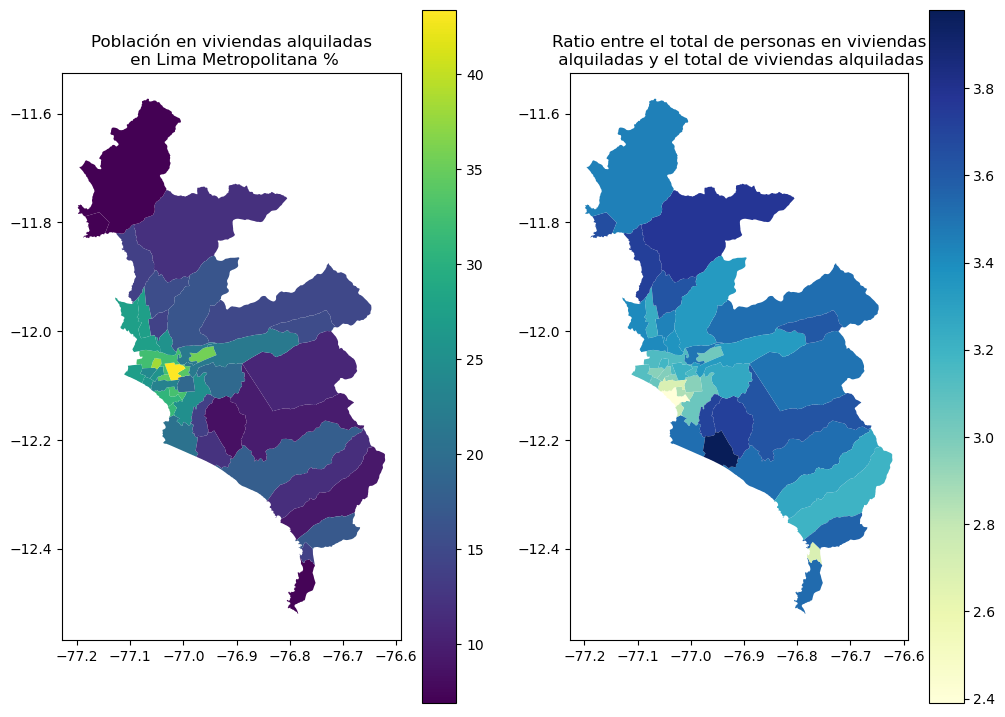

In [26]:
## Hacemos el merge entre la BD espacial y nuestro dataframe con los indicadores que queremos graficar
dis17=gpd.read_file('Bases originales\\Límites nacionales\\Distrito.gpkg') ## en este caso nuestra BD espacial está guardada como gpkg y contiene un único layer
dis17=dis17.set_index('ubigeo').merge(df3, right_index=True, left_index=True, how='inner', validate='1:1')

## Usaremos la libreía Matplotlib para graficar el resultado
fig,ax=plt.subplots(1,2, figsize=(12,9))

dis17.plot("alquiler_pob_p",ax=ax[0], legend=True)
dis17.plot("ratio",ax=ax[1], legend=True, cmap="YlGnBu")

ax[0].set_title("Población en viviendas alquiladas\n en Lima Metropolitana %") 
ax[1].set_title("Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas") 


### Filtros para consultas en REDATAM

Ahora que sabemos el total de población en viviendas alquiladas, podríamos explorar algunas características de su población, como por ejemplo el el ciclo del hogar o si el jefe del hogar vivia en Lima Metropolitana en los últimos 5 años. Para ello necesitaremos hacer otra consulta a redatam especificando el tipo de consulta y las categorias de las variables filtro para que retorne información solo del jefe del hogar que vivi en viviendas alquiladas.

Para ello volveremos usar la tabla de frecuencia, pero a al vez usaremos el parámetro _for_query_ con el cual pasaremos un diccionario con los valores para la consulta

In [136]:
query=redapy.query_final(tipo='Frequency',var1="poblacion.C5P2",area_break="distrito",selection="1501",
                        for_query={'variables':["vivienda.C2P13","poblacion.C5P1"],
                                   'category':["1","1"],
                                   'logical_exp':["equal"],
                                   'operator':['and']})

df=redapy.make_query_2017(query, mensajes=False)
df4=redapy.frequency(df, pivot=True)
print(df4.head())

df4['total_jefe_h']=df4.sum(axis=1)
for p in df4.columns:
    df4[p]=((df4[p]/df4['total_jefe_h'])*100).round(1)
df4.sort_values("Mujer", ascending=False).head()

resp,Hombre,Mujer,total_jefe_h
ubigeo,,,
150138,50.0,50.0,100.0
150113,55.4,44.6,100.0
150121,57.6,42.4,100.0
150104,57.8,42.2,100.0
150116,58.1,41.9,100.0


Una de las ventajas de geopandas, es que cuenta con método para generar mapas interactivos. Este método se llama "explore"